In [1]:
import pandas as pd

data = pd.read_csv('michigan-history.csv')
data.head()

,date,state,dataQualityGrade,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2021-01-26,MI,A+,15305.0,14405.0,86,900,NaN,NaN,1638.0,...,9171401,26969,481240.0,NaN,NaN,NaN,NaN,0,9269199.0,26808
1,2021-01-25,MI,A+,15219.0,14326.0,38,893,NaN,NaN,1668.0,...,9144432,58323,479890.0,NaN,NaN,NaN,NaN,0,9242391.0,60168
2,2021-01-24,MI,A+,15181.0,14291.0,0,890,NaN,NaN,1843.0,...,9086109,0,476180.0,NaN,NaN,NaN,NaN,0,9182223.0,0
3,2021-01-23,MI,A+,15181.0,14291.0,230,890,NaN,NaN,1843.0,...,9086109,52737,476180.0,NaN,NaN,NaN,NaN,0,9182223.0,53925
4,2021-01-22,MI,A+,14951.0,14070.0,18,881,NaN,NaN,1843.0,...,9033372,44844,474589.0,NaN,NaN,NaN,NaN,0,9128298.0,44578


In [2]:
dimension = data.shape
rows = dimension[0]
cols = dimension[1]
print("Number of Rows in Dataset is ",rows)
print("Number of Columns in Dataset is ",cols)

Number of Rows in Dataset is  332
Number of Columns in Dataset is  42


In [3]:
date = []
cases_diff = []
for i in range(0,rows):
    datevalue = data.iloc[i]["date"]
    date.append(datevalue)
    casesvalue = data.iloc[i]["positiveIncrease"]
    cases_diff.append(casesvalue)
print("The number of records in increase in COVID-19 cases in Michigan for each day is ", len(cases_diff))
print("The number of records in date is ", len(date))

The number of records in increase in COVID-19 cases in Michigan for each day is  332
The number of records in date is  332


In [4]:
records = len(cases_diff)
cases = []
date_reorder = []
for j in range(records-1,-1,-1):
    cases.append(cases_diff[j])
    date_reorder.append(date[j])
newdata = pd.DataFrame(list(zip(date_reorder,cases)))
newdata.columns = ['date', 'cases']
newdata.head()

,date,cases
0,2020-03-01,0
1,2020-03-02,13
2,2020-03-03,23
3,2020-03-04,24
4,2020-03-05,26


In [5]:
dimension1 = newdata.shape
rows1 = dimension1[0]
cols1 = dimension1[1]
print("Rows in new data is ", rows1)
print("Columns in new data is ",cols1)

Rows in new data is  332
Columns in new data is  2


In [6]:
import numpy as np
difference = []
difference.append(np.nan)
for i in range(1,rows1):
    diff = newdata.iloc[i][1] - newdata.iloc[i-1][1]
    difference.append(diff)
newdata['difference'] = difference
newdata.tail()

,date,cases,difference
327,2021-01-22,2538,25.0
328,2021-01-23,1826,-712.0
329,2021-01-24,0,-1826.0
330,2021-01-25,3347,3347.0
331,2021-01-26,2075,-1272.0


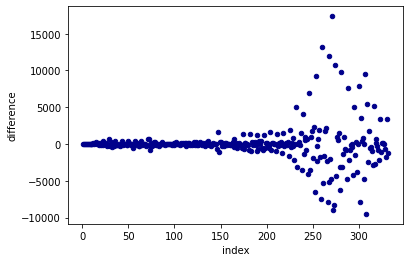

In [7]:
newdata['index'] = newdata.index
ax1 = newdata.plot.scatter(x = 'index', y = 'difference', c = 'DarkBlue')

In [8]:
newdata.head()

,date,cases,difference,index
0,2020-03-01,0,NaN,0
1,2020-03-02,13,13.0,1
2,2020-03-03,23,10.0,2
3,2020-03-04,24,1.0,3
4,2020-03-05,26,2.0,4


In [9]:
for i in range(0,42):
    print(data.iloc[1][i])

2021-01-25
MI
A+
15219.0
14326.0
38
893
nan
nan
1668.0
0
nan
392.0
8544339.0
54976
nan
nan
8544339.0
nan
199.0
600093
551080
3347
0
nan
nan
nan
nan
698052.0
463106.0
nan
0
9144432
58323
479890.0
nan
nan
nan
nan
0
9242391.0
60168
